# **Wine Quality**

## **Problem Statement**

## 1. Goal of the Dataset

 To analyze wine ratings, price variations, and customer preferences based on wine attributes like body, acidity, and type.

## 2. Description of Dataset

 This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

## 3. About the Dataset

 The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. This was collected using web scraping from different sources (from wine specialized pages to supermarkets).

https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

##Libraraies

In [84]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report  # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

## Reading and understanding the da

In [85]:
wine=pd.read_csv("/content/wines_SPA.csv")
wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [86]:
wine.shape

(7500, 11)

In [87]:
wine.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [88]:
wine.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
7499,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0


In [89]:
wine.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
3554,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
3908,Bodegas La Horra,Corimbo I,2015,4.2,412,Espana,Ribera del Duero,37.90,Ribera Del Duero Red,5.0,3.0
1369,El Grillo y La Luna,Grillo,2012,4.3,200,Espana,Somontano,32.90,Red,4.0,3.0
2667,Artadi,Valdegines,2016,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,4.0,2.0
3582,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Espana,Rioja,13.58,Rioja Red,4.0,3.0


##Summerized information of columns in Dataset

In [90]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [91]:
wine.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [92]:
wine.describe(include=['O']).T

,count,unique,top,freq
winery,7500,480,Contino,457
wine,7500,847,Reserva,467
year,7498,71,2011,1190
country,7500,1,Espana,7500
region,7500,76,Rioja,2440
type,6955,21,Rioja Red,2357


##Visualizations of the the Features

###Winery & Country of Origin

In [93]:
wine['winery'].value_counts()

,count
winery,
Contino,457
Artadi,261
La Rioja Alta,254
Sierra Cantabria,237
Matarromera,232
...,...
Loess,1
Dominio de Anza,1
Samsara,1


In [94]:
wine['country'].value_counts()

,count
country,
Espana,7500


Inference:
* "Contino" is the most place where wine is produced.
* In the country feature all the wines are originated in Espana country ( Espana is the Spanish name for Spain ).

###Year

In [95]:
wine['year'].value_counts()

,count
year,
2011,1190
2016,897
2015,860
2018,850
2017,731
...,...
1928,1
1949,1
1922,1


Inference:
* Most of the the grapes were harvested in the year 2011

###Rating & Review

In [96]:
wine['rating'].value_counts()

,count
rating,
4.2,5679
4.3,707
4.4,484
4.5,281
4.6,191
4.7,112
4.8,44
4.9,2


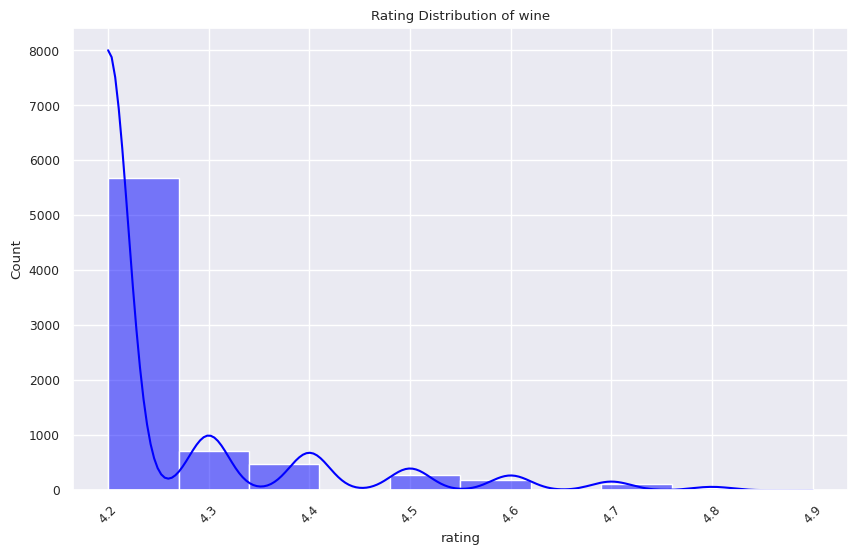

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(wine['rating'],kde=True,bins=10,color='blue')
plt.title('Rating Distribution of wine')
plt.xticks(rotation=45)
plt.show()

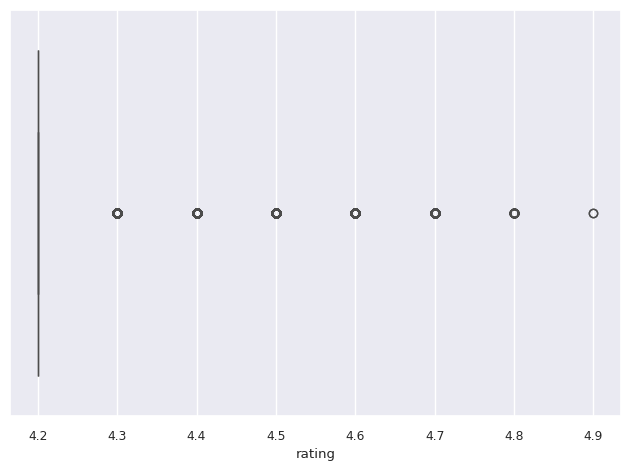

In [98]:
sns.boxplot(x=wine['rating'],data=wine)
plt.tight_layout()
plt.show()

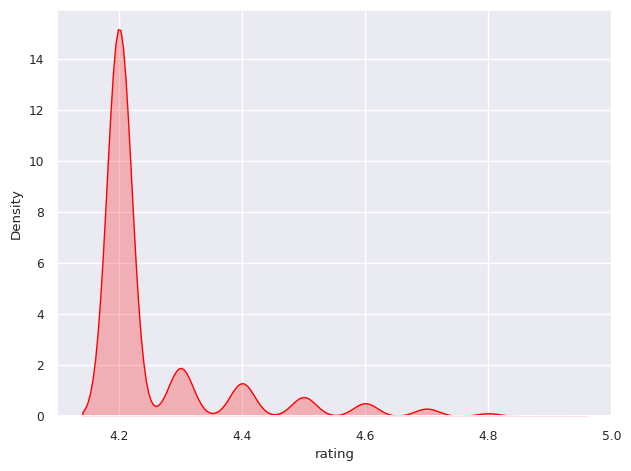

In [99]:
sns.kdeplot(data=wine,x=wine['rating'],fill=True,common_norm=True,color='red')
plt.tight_layout()
plt.show()

Inference :
*  The histpgram is right-skewed, many wines have low ratings.
* In boxplot, outliers (dots outside whiskers) indicate wines with unusually high or low ratings.
* In kdeplot, peaks show where ratings are most concentrated

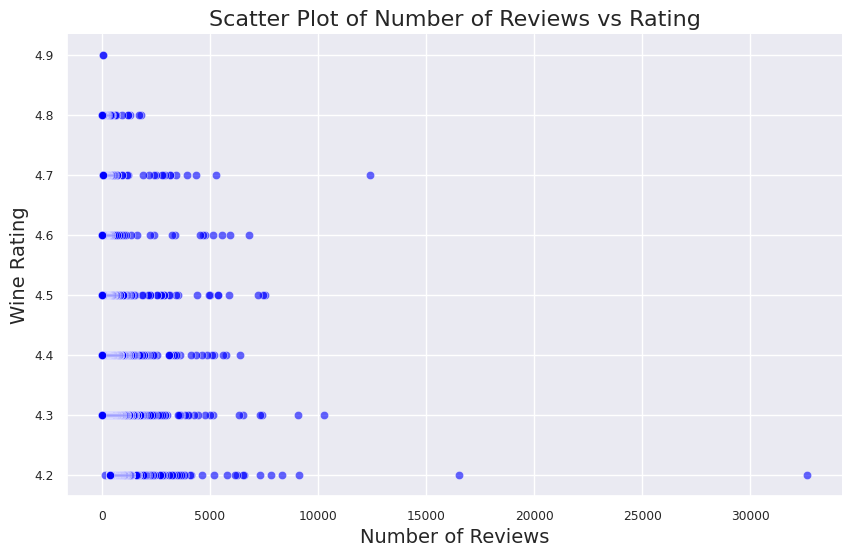

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine['num_reviews'], y=wine['rating'], alpha=0.6, color='blue')
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Wine Rating", fontsize=14)
plt.title("Scatter Plot of Number of Reviews vs Rating", fontsize=16)
sns.despine()
plt.show()

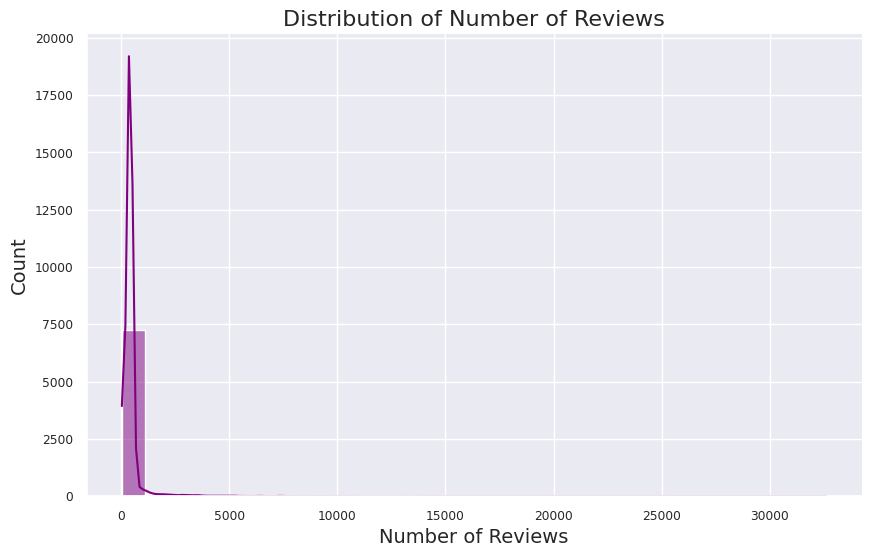

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(wine['num_reviews'], bins=30, kde=True, color='purple')
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Number of Reviews", fontsize=16)
sns.despine()
plt.show()

Inference:
* In scatterplot some wines have many reviews but low ratings, it may indicate controversial wines (widely reviewed but not well-liked).
* The histogram has a long tail on the right, it indicates that most wines have fewer reviews, while a few wines have a very high number of reviews.

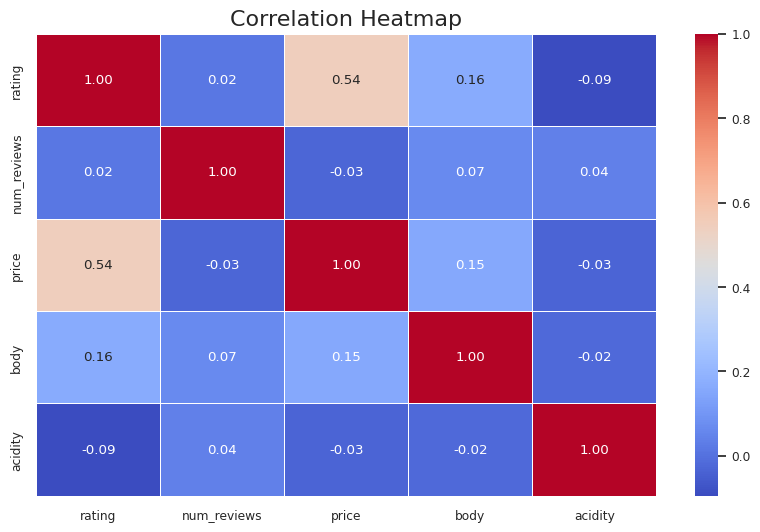

In [102]:
numerical_columns = wine.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(wine[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Inference:

1.Strong Positive Correlations:

rating and price (0.54): This suggests that higher-priced products tend to receive higher ratings.

num_reviews and itself (1.00), body and itself (1.00), and so on (trivial due to self-correlation).

2.Weak or Negligible Correlations:

rating and num_reviews (0.02): The number of reviews does not significantly impact ratings.

num_reviews and price (-0.03): No significant relationship between the number of reviews and price.

body and price (0.15): Slight positive correlation, meaning body might slightly increase with price.

body and num_reviews (0.07): Minimal correlation.

3.Negative Correlations:

acidity and rating (-0.09): Slight negative correlation, suggesting that as acidity increases, ratings may decrease.

acidity and price (-0.03): A weak negative correlation, meaning acidity does not play a major role in pricing.

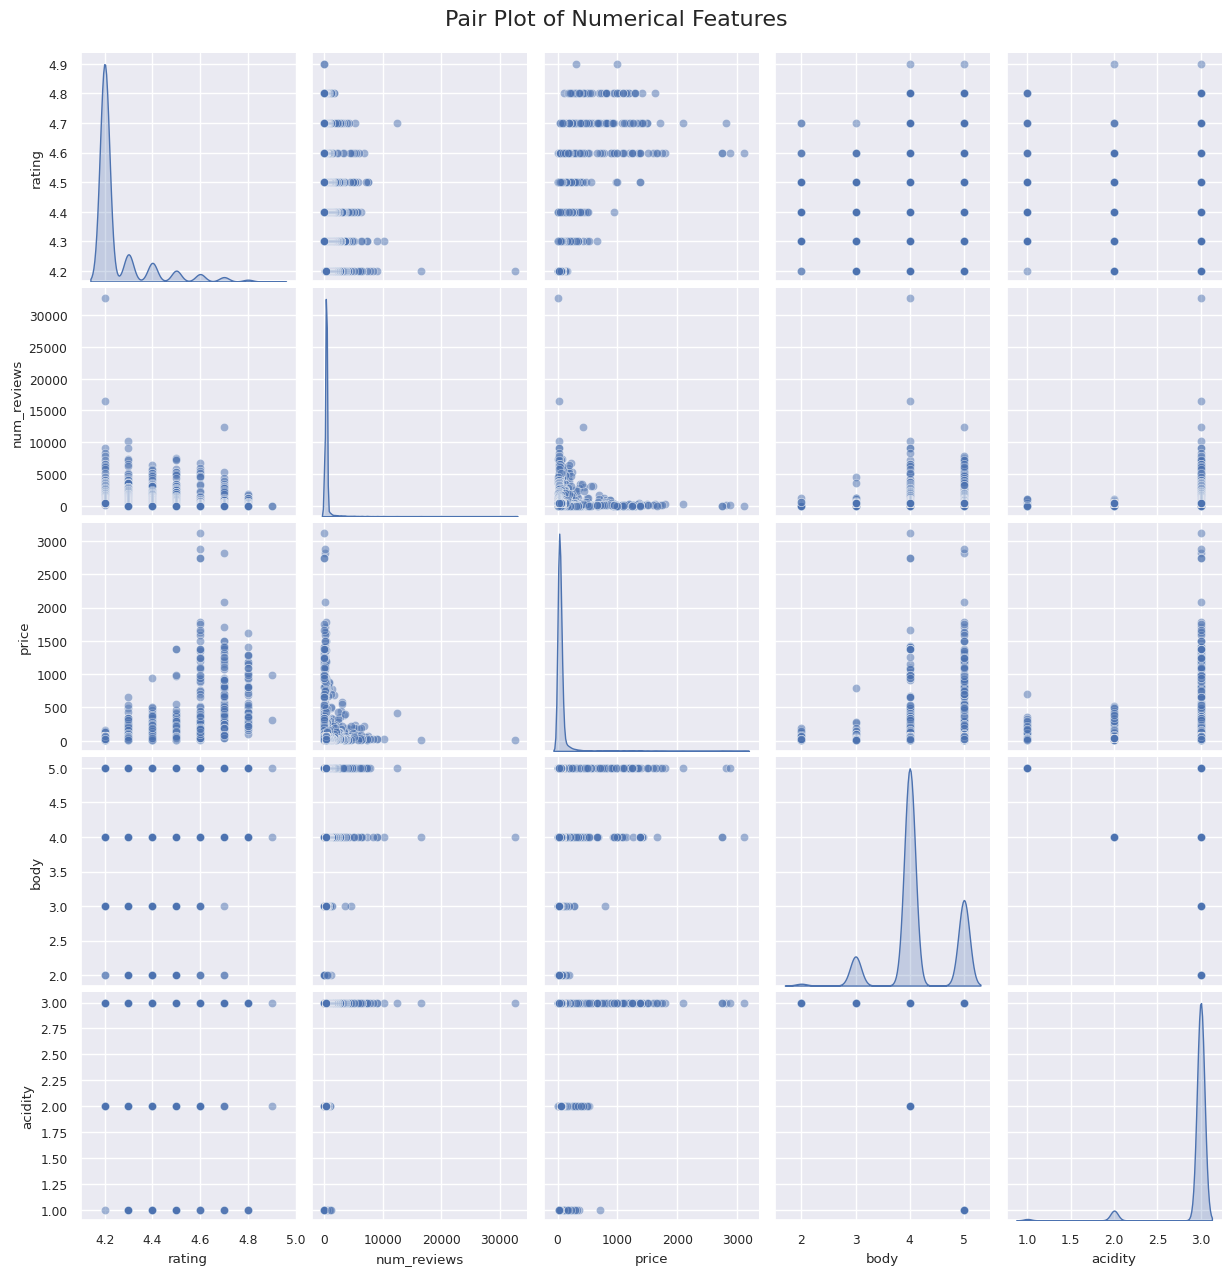

In [103]:
numerical_columns = wine.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(wine[numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical Features", fontsize=16, y=1.02)
plt.show()

Overall Insights:

* The dataset contains highly skewed distributions for num_reviews and price, meaning a few products dominate these features.

* Ratings are generally high, with most products above 4.2.

* Expensive products don’t necessarily get more reviews but may have higher ratings.

* Features like body and acidity appear to be categorical or ordinal, rather than continuous.



###Region & Type

In [104]:
wine['region'].value_counts()

,count
region,
Rioja,2440
Ribera del Duero,1413
Priorato,686
Toro,300
Vino de Espana,263
...,...
Otazu,1
Valdejalon,1
Terra Alta,1


In [105]:
wine['type'].value_counts()

,count
type,
Rioja Red,2357
Ribera Del Duero Red,1407
Red,864
Priorat Red,674
Toro Red,296
Tempranillo,291
Sherry,274
Albarino,252
Mencia,235


Inference:
* The region "Rioja" have significantly higher counts, it means the dataset focuses more on wines from "Rioja" regions.
* The type "Rioja Red" have significantly higher counts, it means the dataset focuses more on wines "Rioja Red" type.

###Body & Acidity

In [106]:
wine['body'].value_counts()

,count
body,
4.0,4120
5.0,1624
3.0,553
2.0,34


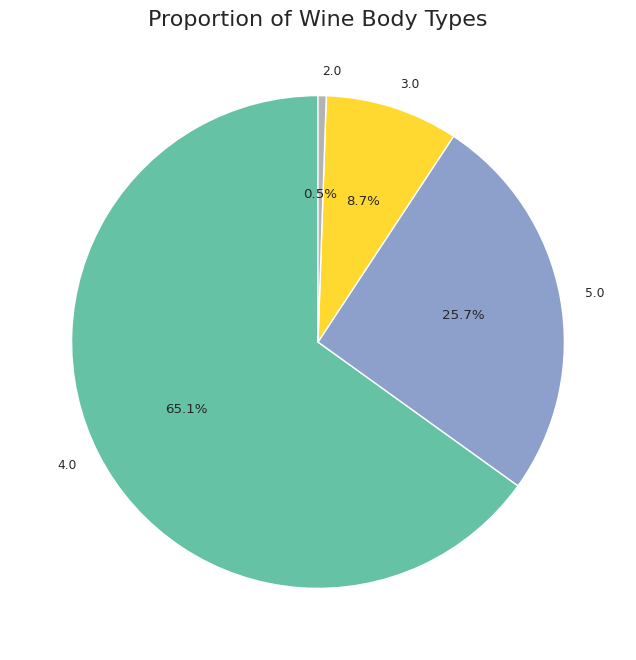

In [107]:
plt.figure(figsize=(8, 8))
wine['body'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Set2', startangle=90)
plt.ylabel("")
plt.title("Proportion of Wine Body Types", fontsize=16)
plt.show()

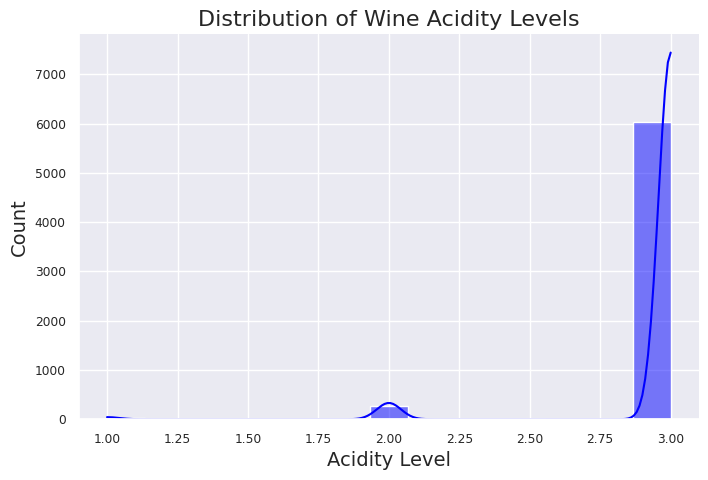

In [108]:
plt.figure(figsize=(8, 5))
sns.histplot(wine['acidity'], bins=15, kde=True, color="blue")
plt.xlabel("Acidity Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Wine Acidity Levels", fontsize=16)
sns.despine()
plt.show()

Inference:
* Most wines have higher acidity values, as the majority of data points are concentrated toward the higher end of the scale.
* A few wines have very low acidity, pulling the tail towards the left.
* The mean acidity is lower than the median, meaning extreme low-acidity values are affecting the average.
* This might suggest that low-acidity wines are rare, while most wines in the dataset tend to be more acidic.

###Target Variable

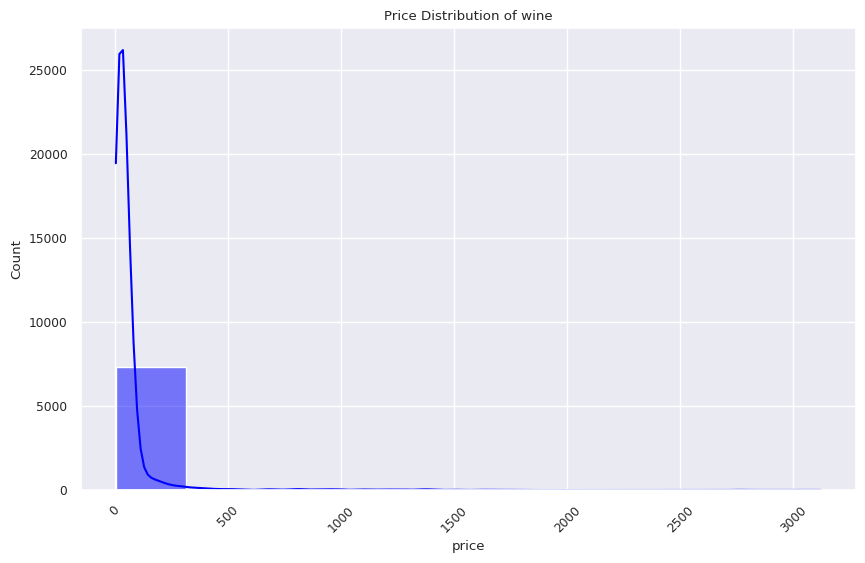

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(wine['price'],kde=True,bins=10,color='blue')
plt.title('Price Distribution of wine')
plt.xticks(rotation=45)
plt.show()



* If the histogram is right-skewed, most wines are in the lower price range, with a few expensive wines.

* If it is normally distributed, wine prices are evenly spread.

* The bins=10 setting groups prices into 10 intervals for better clarity.

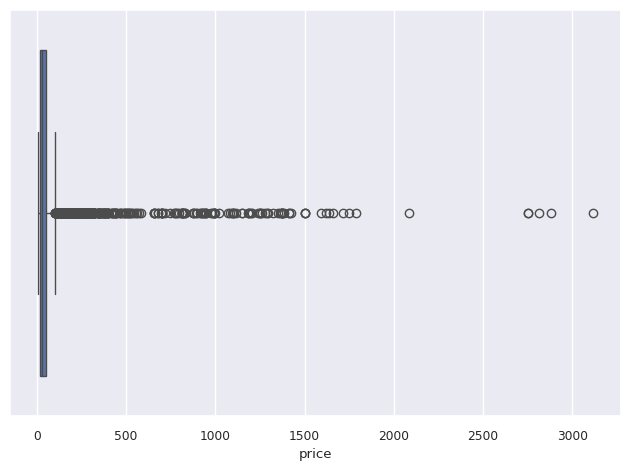

In [110]:
sns.boxplot(x=wine['price'],data=wine)
plt.tight_layout()
plt.show()

* The box (IQR - Interquartile Range) represents the middle 50% of wine prices.

* The whiskers extend to the lowest and highest non-outlier values.

* Dots beyond the whiskers are outliers (high-priced wines).

Overall Inference:
* If the box plot shows many outliers above the upper whisker, the dataset contains some very expensive wines.

* A long box means high price variability, while a short box means most prices are clustered around the median.



##Categorical Data Analysis

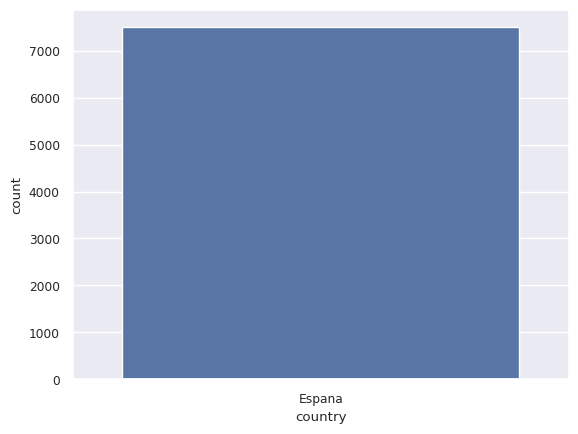

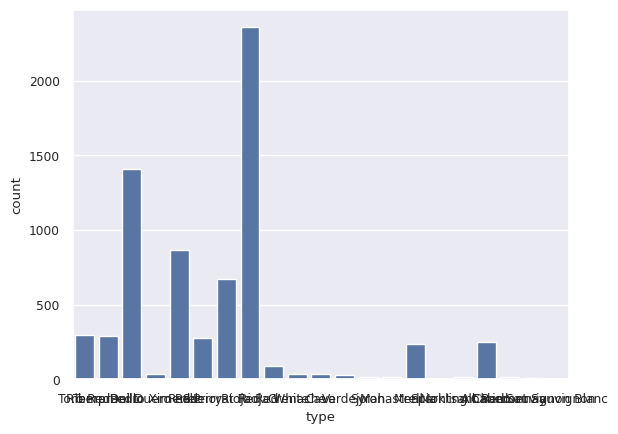

In [111]:
for col in wine.select_dtypes(include='object'):
  if wine[col].nunique()<=22:
    sns.countplot(x=col,data=wine)
    plt.show()

## Data Cleaning

###Handling Duplicates

In [112]:
wine.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7495,True
7496,True
7497,True
7498,True


In [113]:
wine.drop_duplicates(inplace=True)

###Handling Missing Values

In [114]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         1942 non-null   object 
 9   body         1777 non-null   float64
 10  acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


In [115]:
wine.isnull().sum()

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,106
body,271


In [116]:
#Columns with missing values
wine.isna().sum()[wine.isna().sum() != 0]

,0
year,2
type,106
body,271
acidity,271


In [117]:
(wine.isna().sum()/wine.shape[0]*100).round(2)

,0
winery,0.00
wine,0.00
year,0.10
rating,0.00
num_reviews,0.00
country,0.00
region,0.00
price,0.00
type,5.18
body,13.23


In [118]:
wine['year'].fillna(wine['year'].mode()[0],inplace=True)
wine['type'].fillna(wine['type'].mode()[0],inplace=True)

<ipython-input-118-876ddd241181>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['year'].fillna(wine['year'].mode()[0],inplace=True)
<ipython-input-118-876ddd241181>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [119]:
wine.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,271


In [120]:
wine['body'].fillna(wine['body'].median(),inplace=True)
wine['acidity'].fillna(wine['acidity'].median(),inplace=True)

<ipython-input-120-a306056b3634>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['body'].fillna(wine['body'].median(),inplace=True)
<ipython-input-120-a306056b3634>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [121]:
wine.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [122]:
wine.drop(columns=["country"],inplace=True,errors="ignore")

*This is a spanish wine quality dataset. The origin of the wine is same ( All are originated from Espana(Spain)). So we drop that column.

##Covert categorical variable into Numerical

In [123]:
#Columns of object type
cats_cols=wine.columns[wine.dtypes=='object']
cats_cols

Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object')

###Convert columns to integer type


In [124]:
# Check unique values to identify issues
print(wine["year"].unique())
# Remove non-numeric values (e.g., replace NaN with a default year, like 2000)
wine["year"] = pd.to_numeric(wine["year"], errors="coerce")  # Convert to numbers, set errors as NaN
wine.dropna(subset=["year"], inplace=True)  # Drop rows where "year" is NaN
# Convert to integer after cleaning
wine["year"] = wine["year"].astype(int)
# Confirm successful conversion
wine.dtypes

['2013' '2018' '2009' '1999' '1996' '1998' '2010' '1995' '2015' '2011'
 '2016' '1970' '1946' '1962' '2019' '2004' 'N.V.' '1931' '1979' '2005'
 '2020' '2014' '1985' '1929' '2007' '2012' '2017' '2008' '2006' '2000'
 '2003' '2002' '1991' '1994' '1990' '1989' '1987' '1986' '1981' '2001'
 '1968' '1964' '1982' '1974' '1983' '1955' '1980' '1972' '1953' '1958'
 '1942' '1965' '1992' '1973' '1997' '1967' '1975' '1910' '1961' '1954'
 '1988' '1969' '1951' '1928' '1976' '1949' '2021' '1959' '1922' '1978'
 '1925']


,0
winery,object
wine,object
year,int64
rating,float64
num_reviews,int64
region,object
price,float64
type,object
body,float64
acidity,float64


In [125]:
# Confirm successful conversion
wine.dtypes

,0
winery,object
wine,object
year,int64
rating,float64
num_reviews,int64
region,object
price,float64
type,object
body,float64
acidity,float64


###Label Encoding - Nominal Data

In [126]:
cats_cols=wine.columns[wine.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  wine[cats_col]=le.fit_transform(wine[cats_col])
wine.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,392,694,2013,4.9,58,65,995.00,19,5.0,3.0
1,31,750,2018,4.9,31,70,313.50,18,4.0,2.0
2,415,712,2009,4.8,1793,53,324.95,11,5.0,3.0
3,415,712,1999,4.8,1705,53,692.96,11,5.0,3.0
4,415,712,1996,4.8,1309,53,778.06,11,5.0,3.0


In [127]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1978 non-null   int64  
 1   wine         1978 non-null   int64  
 2   year         1978 non-null   int64  
 3   rating       1978 non-null   float64
 4   num_reviews  1978 non-null   int64  
 5   region       1978 non-null   int64  
 6   price        1978 non-null   float64
 7   type         1978 non-null   int64  
 8   body         1978 non-null   float64
 9   acidity      1978 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 170.0 KB


##Data Transformations -Numerical Data Analysis

### Skeweness

####Histogram

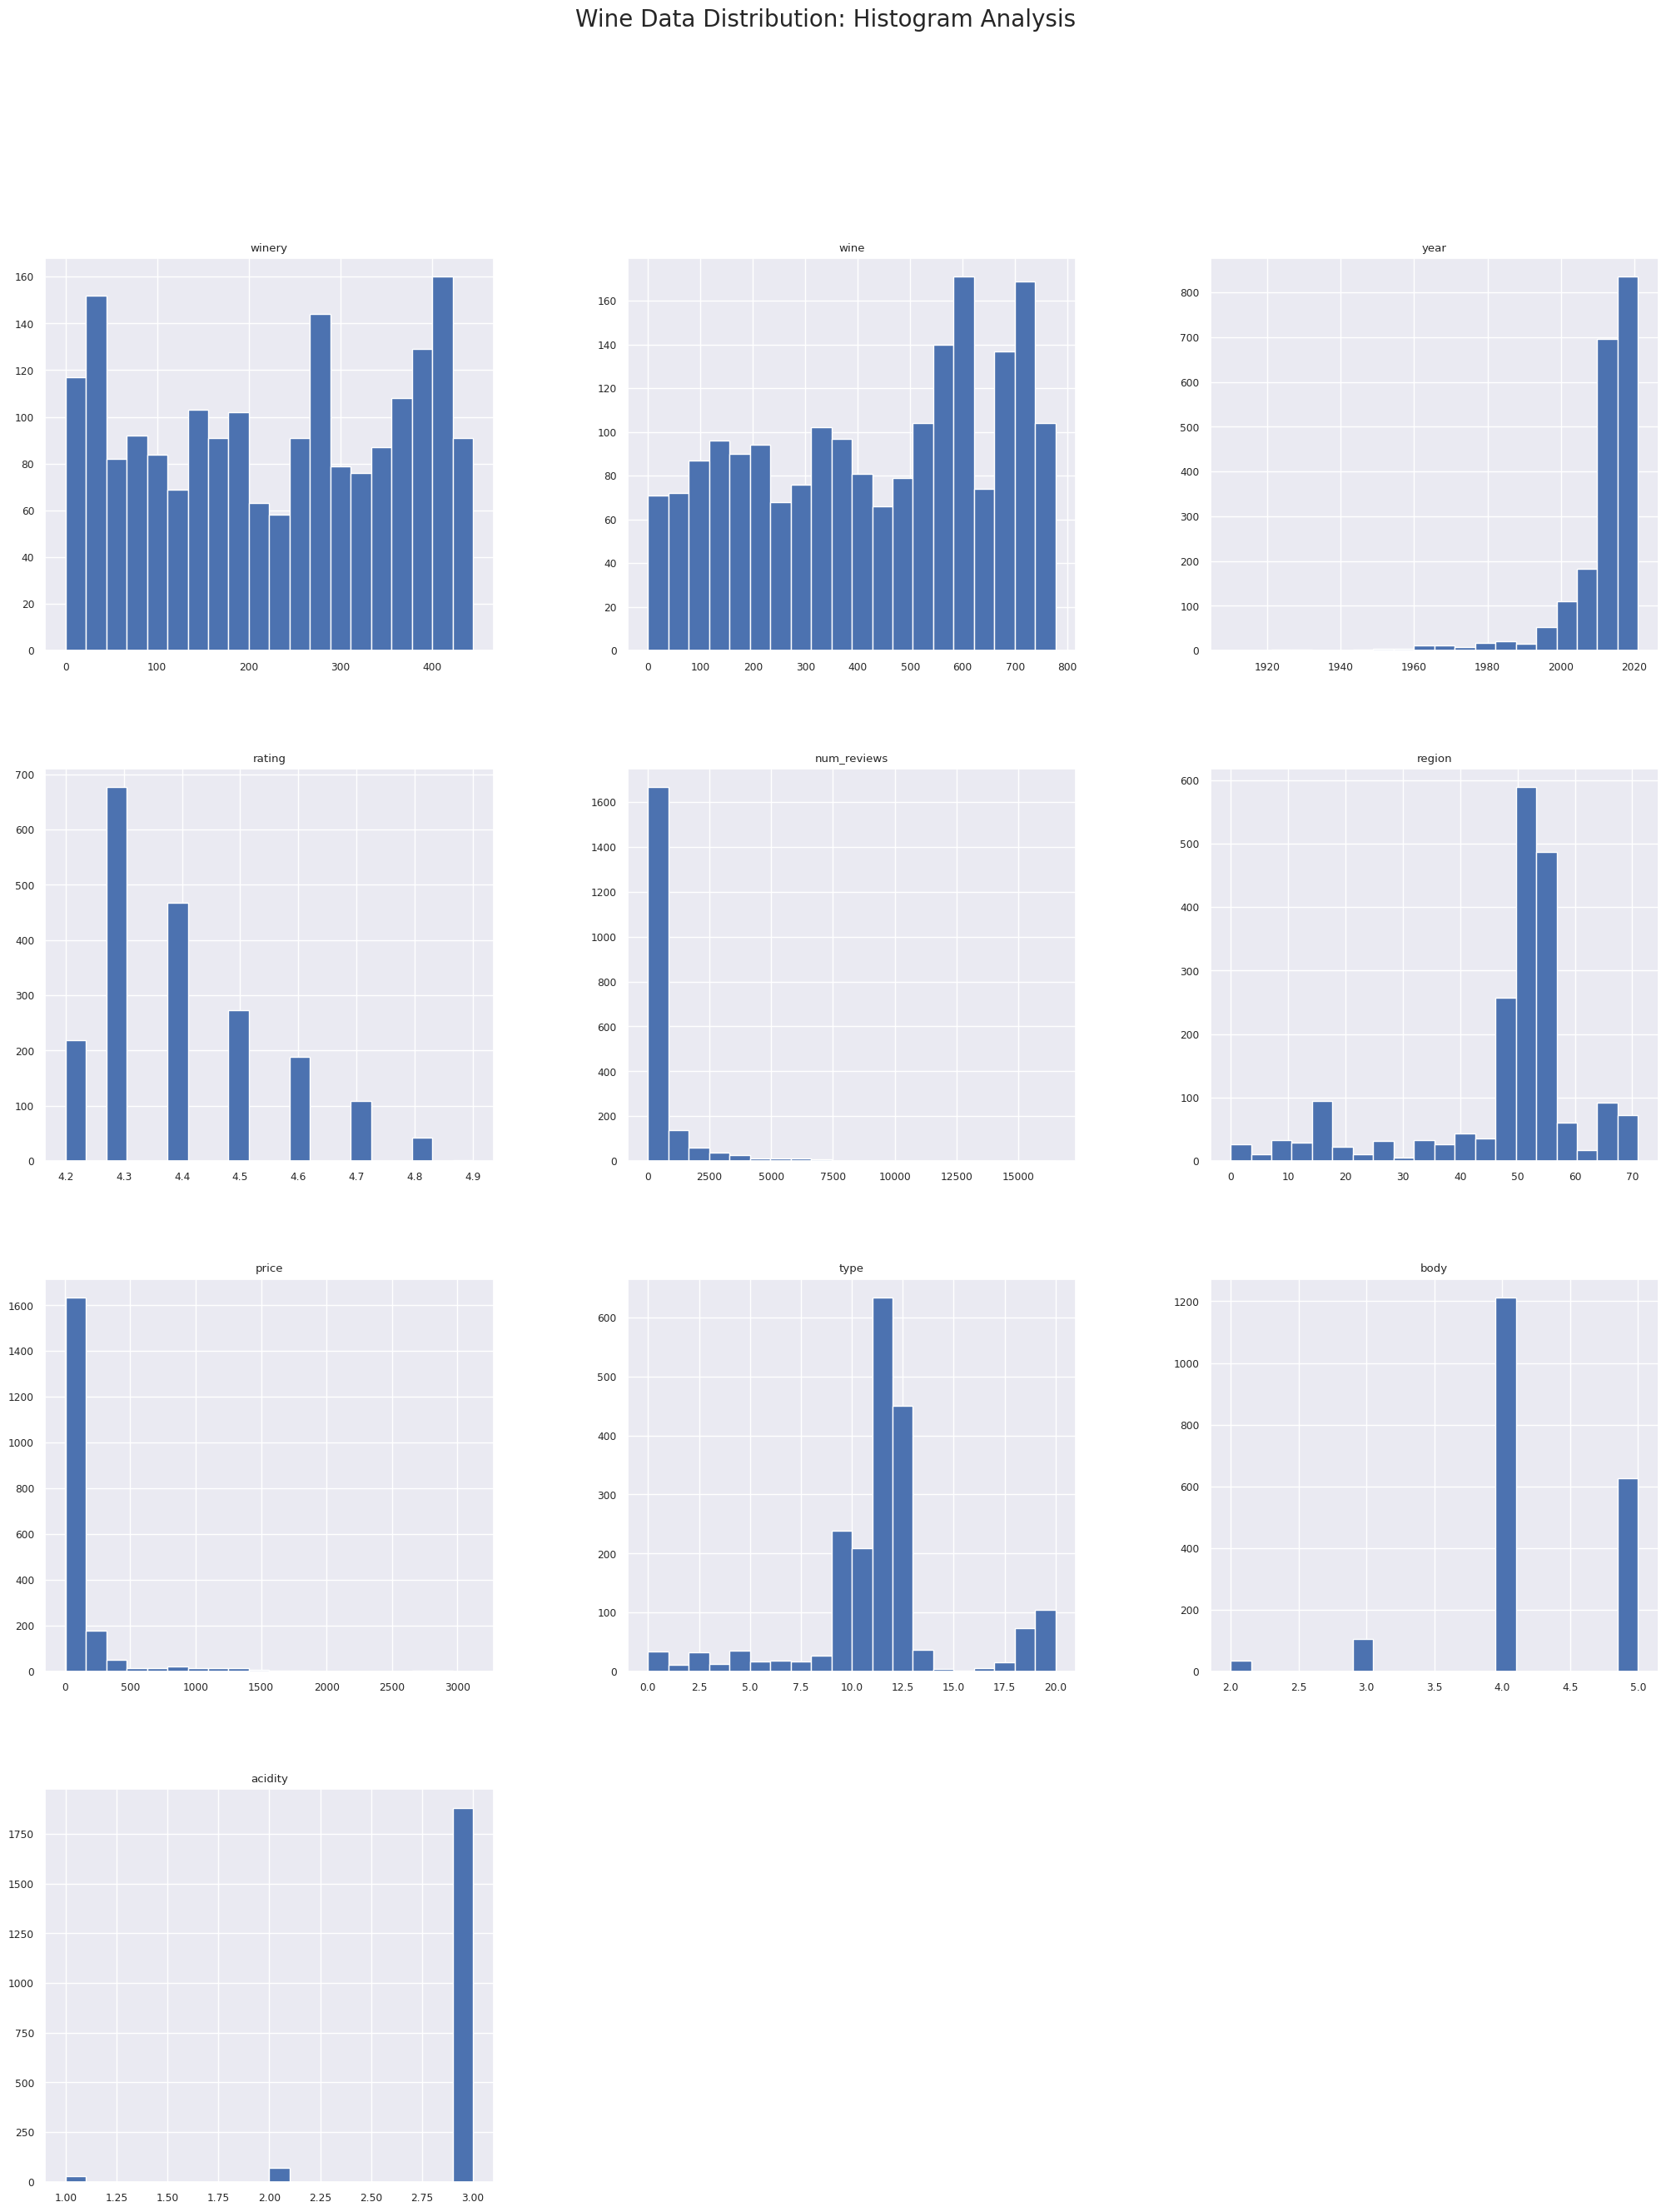

In [128]:
wine.hist(bins=20,figsize=(25,30))
plt.suptitle('Wine Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [129]:
# Calculate skewness for each column
skewness = wine.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Displays the sorted skewness values
print(sorted_skewness)

acidity       -5.080158
year          -3.694519
region        -1.584791
body          -0.631090
wine          -0.235692
type          -0.164127
winery        -0.076774
rating         0.792350
num_reviews    4.805092
price          5.036503
dtype: float64


In [130]:
# Step 1: Select numeric columns, excluding 'rating'
numeric_columns=wine.drop(columns=['rating']).select_dtypes(include=['number'])
# Step 2: Calculate skewness for numeric columns
skewness=numeric_columns.skew()
# Step 3: Identify columns with high skewness (threshold > 1 or < -1)
highly_skewed_columns=skewness[abs(skewness)>1].index
# Step 4: Apply log Transformation using np.log1p() for columns with high skewness
for col in highly_skewed_columns:
  # Create a new column with log-transformed values
  wine[col]=np.log1p(wine[col])
# Check transformed columns
wine.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,392,694,7.607878,4.9,4.077537,4.189655,6.903747,19,5.0,1.386294
1,31,750,7.610358,4.9,3.465736,4.262680,5.750984,18,4.0,1.098612
2,415,712,7.605890,4.8,7.492203,3.988984,5.786744,11,5.0,1.386294
3,415,712,7.600902,4.8,7.441907,3.988984,6.542414,11,5.0,1.386294
4,415,712,7.599401,4.8,7.177782,3.988984,6.658088,11,5.0,1.386294


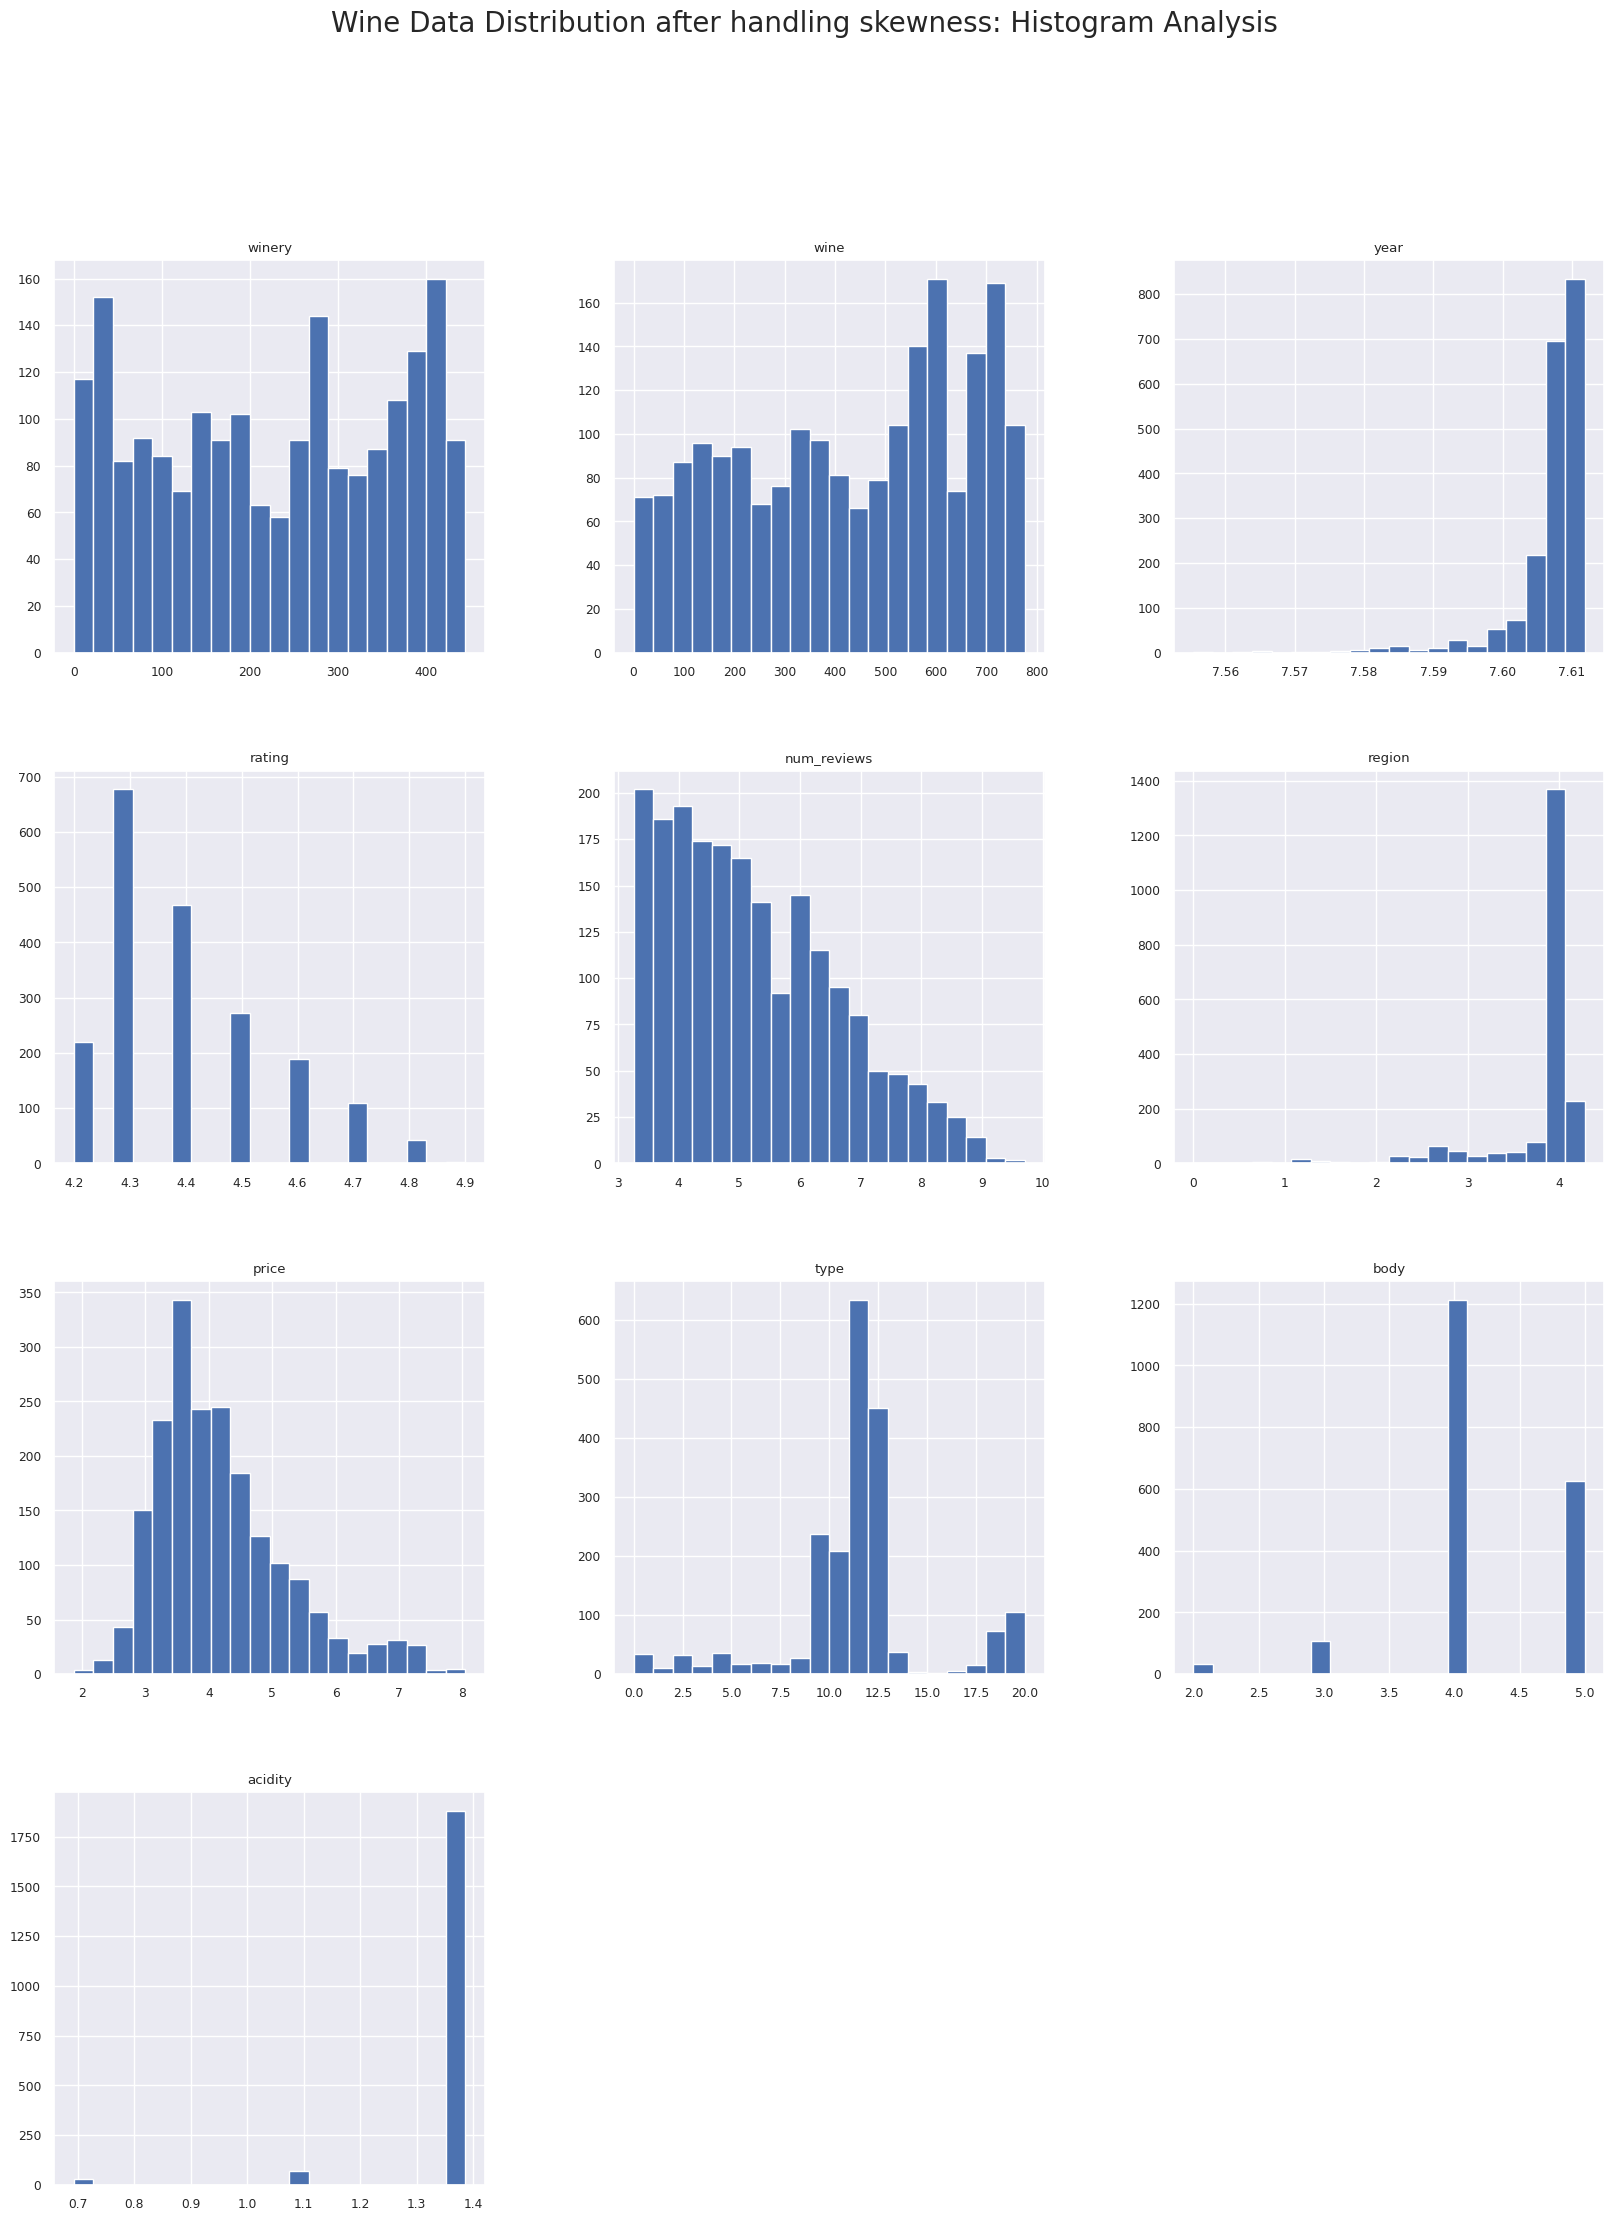

In [131]:
wine.hist(bins=20,figsize=(20,25))
plt.suptitle('Wine Data Distribution after handling skewness: Histogram Analysis', fontsize=20)
plt.show()

### Scaling

####Standardization

In [132]:
# Create a copy of the original data for comparison
wine_scaled_df = wine.copy()
# Select numeric columns, excluding 'rating'
numeric_columns = wine.drop(columns=['rating']).select_dtypes(include=['number']).columns
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply the scaler only to the numeric columns
wine_scaled_df[numeric_columns] = scaler.fit_transform(wine[numeric_columns])
wine_scaled_df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,1.211209,1.169174,0.165968,4.9,-0.827310,0.717590,2.610337,2.255659,1.240773,0.205894
1,-1.424692,1.417048,0.607612,4.9,-1.264902,0.853568,1.499948,1.975789,-0.367516,-2.809621
2,1.379147,1.248848,-0.188137,4.8,1.615035,0.343927,1.534393,0.016696,1.240773,0.205894
3,1.379147,1.248848,-1.076493,4.8,1.579060,0.343927,2.262286,0.016696,1.240773,0.205894
4,1.379147,1.248848,-1.343866,4.8,1.390145,0.343927,2.373708,0.016696,1.240773,0.205894


###Non - Relevent Columns

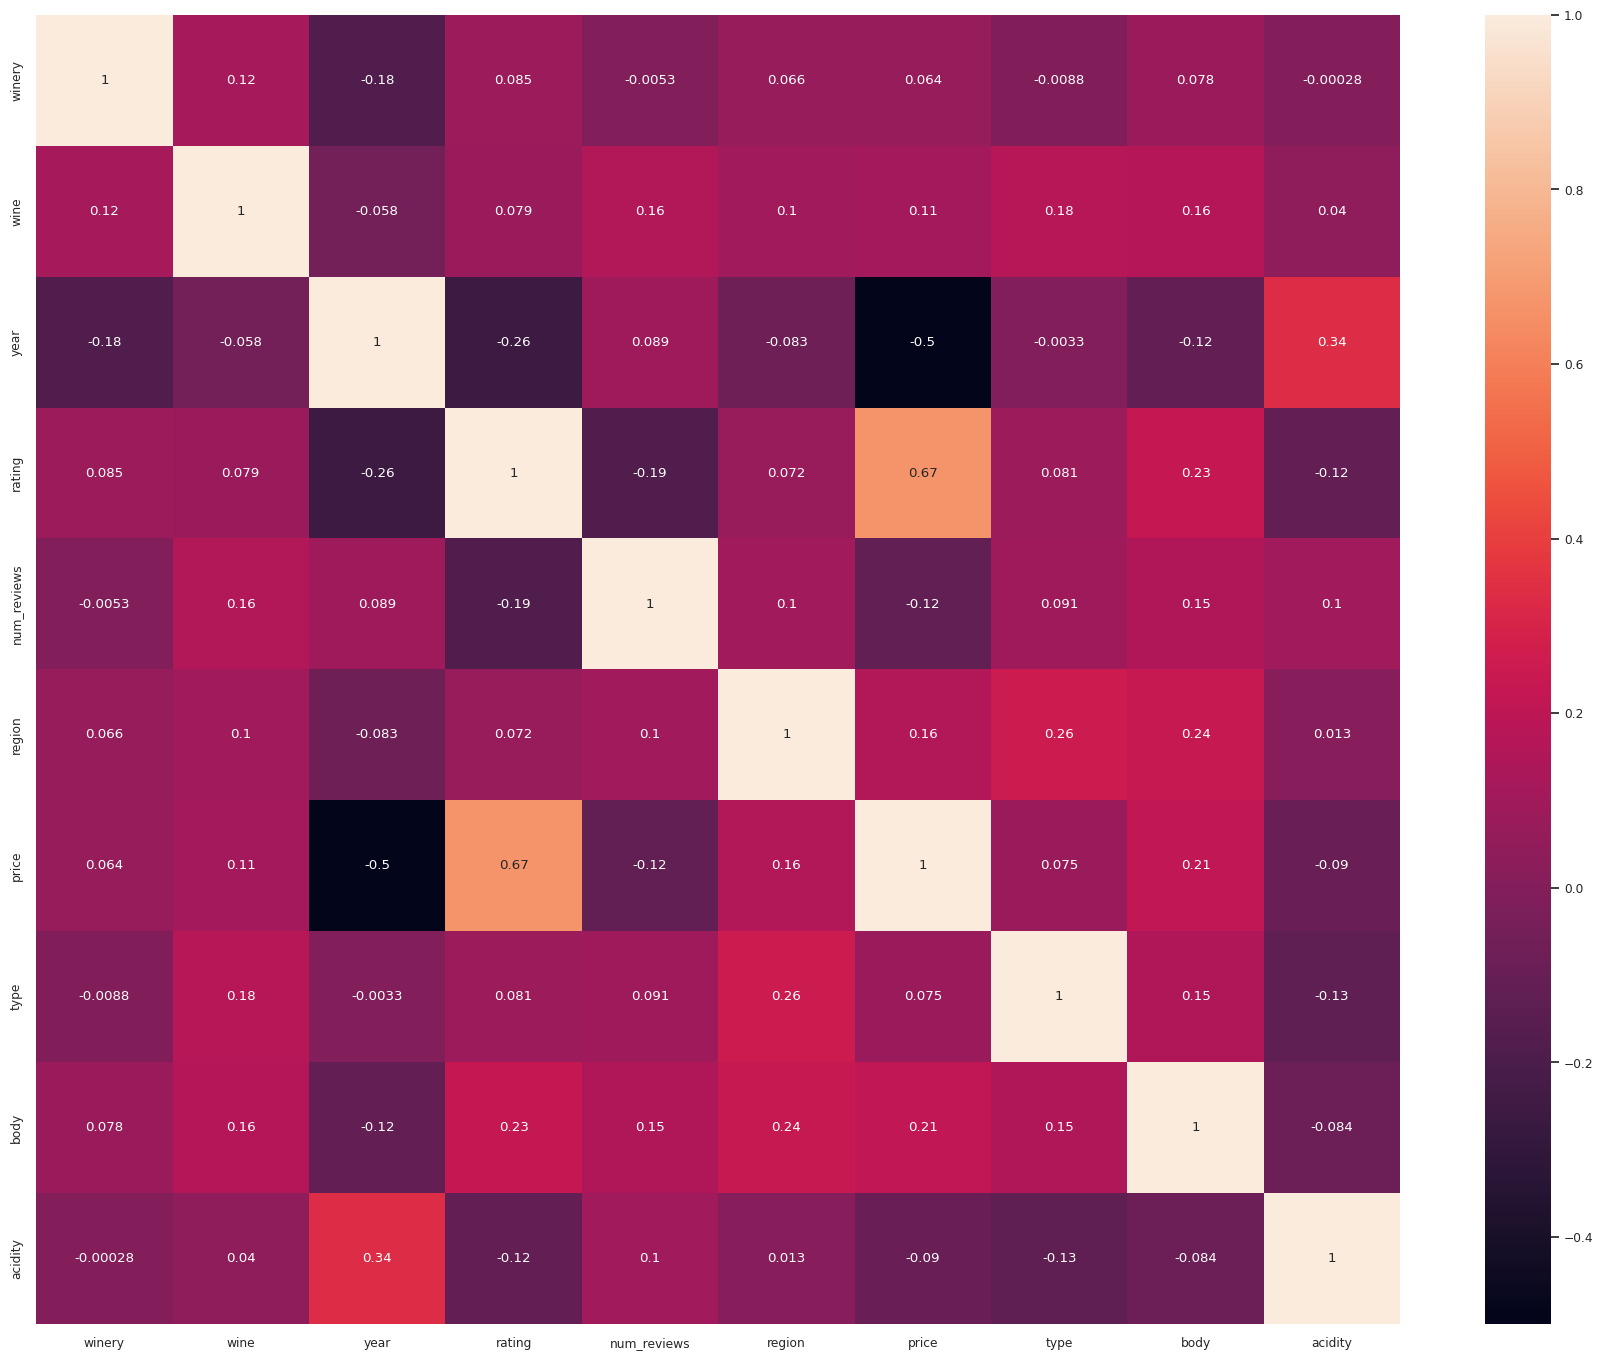

In [133]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(wine.corr(),annot=True,cmap='rocket')
plt.show()

In [134]:
data_corr=wine.corr()
data_corr.style.background_gradient(cmap="cool")

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
winery,1.000000,0.120385,-0.184682,0.085486,-0.005338,0.065765,0.063869,-0.008765,0.078007,-0.000285
wine,0.120385,1.000000,-0.057863,0.079466,0.161843,0.102759,0.112358,0.179546,0.163524,0.039506
year,-0.184682,-0.057863,1.000000,-0.260254,0.089265,-0.083114,-0.499357,-0.003301,-0.116159,0.335621
rating,0.085486,0.079466,-0.260254,1.000000,-0.187440,0.071651,0.668424,0.081181,0.229058,-0.118099
num_reviews,-0.005338,0.161843,0.089265,-0.187440,1.000000,0.101646,-0.118936,0.090502,0.151396,0.101701
region,0.065765,0.102759,-0.083114,0.071651,0.101646,1.000000,0.157663,0.255027,0.237313,0.012950
price,0.063869,0.112358,-0.499357,0.668424,-0.118936,0.157663,1.000000,0.075474,0.210640,-0.090400
type,-0.008765,0.179546,-0.003301,0.081181,0.090502,0.255027,0.075474,1.000000,0.154732,-0.129236
body,0.078007,0.163524,-0.116159,0.229058,0.151396,0.237313,0.210640,0.154732,1.000000,-0.083836
acidity,-0.000285,0.039506,0.335621,-0.118099,0.101701,0.012950,-0.090400,-0.129236,-0.083836,1.000000


 **Useful Features for Predicting price**

1. rating (0.320985) : Moderate Positive Correlation

   * Higher-rated wines tend to be more expensive.

   * A significant factor in determining price.

2. region (0.111437) : Weak Positive Correlation

   * The region might have some effect on price, but it's not a strong predictor.

3. body (0.041763) & type (0.029732) : Very Weak Positive Correlation

  * These features have little impact on price, but may still add minor
  insights.

In [135]:
# Below features are very less correlated with the target variable:
wine.drop(['body','type'],axis=1,inplace=True)

In [136]:
# Irrelevemt columns
wine.drop('wine', axis=1, inplace=True)
wine.drop('winery', axis=1, inplace=True)
wine.drop('acidity', axis=1, inplace=True)
#wine.drop('num_reviews', axis=1, inplace=True)
#wine.drop('year', axis=1, inplace=True)

In [137]:
# Step 1: Calculate the correlation of each feature with the target
corr_with_taarget=wine.corr()['price'].sort_values(ascending=False)

# Step 2: Set the threshold for low correlation (-0.1 to 0.1)
low_corr_features=corr_with_taarget[(corr_with_taarget>-0.1) & (corr_with_taarget<0.1)]

# Step 3: Print the list of features with low correlation
print("Features with correlation between -0.1 and 0.1:")
low_corr_features

Features with correlation between -0.1 and 0.1:


,price


In [138]:
wine.columns

Index(['year', 'rating', 'num_reviews', 'region', 'price'], dtype='object')

###Outliers

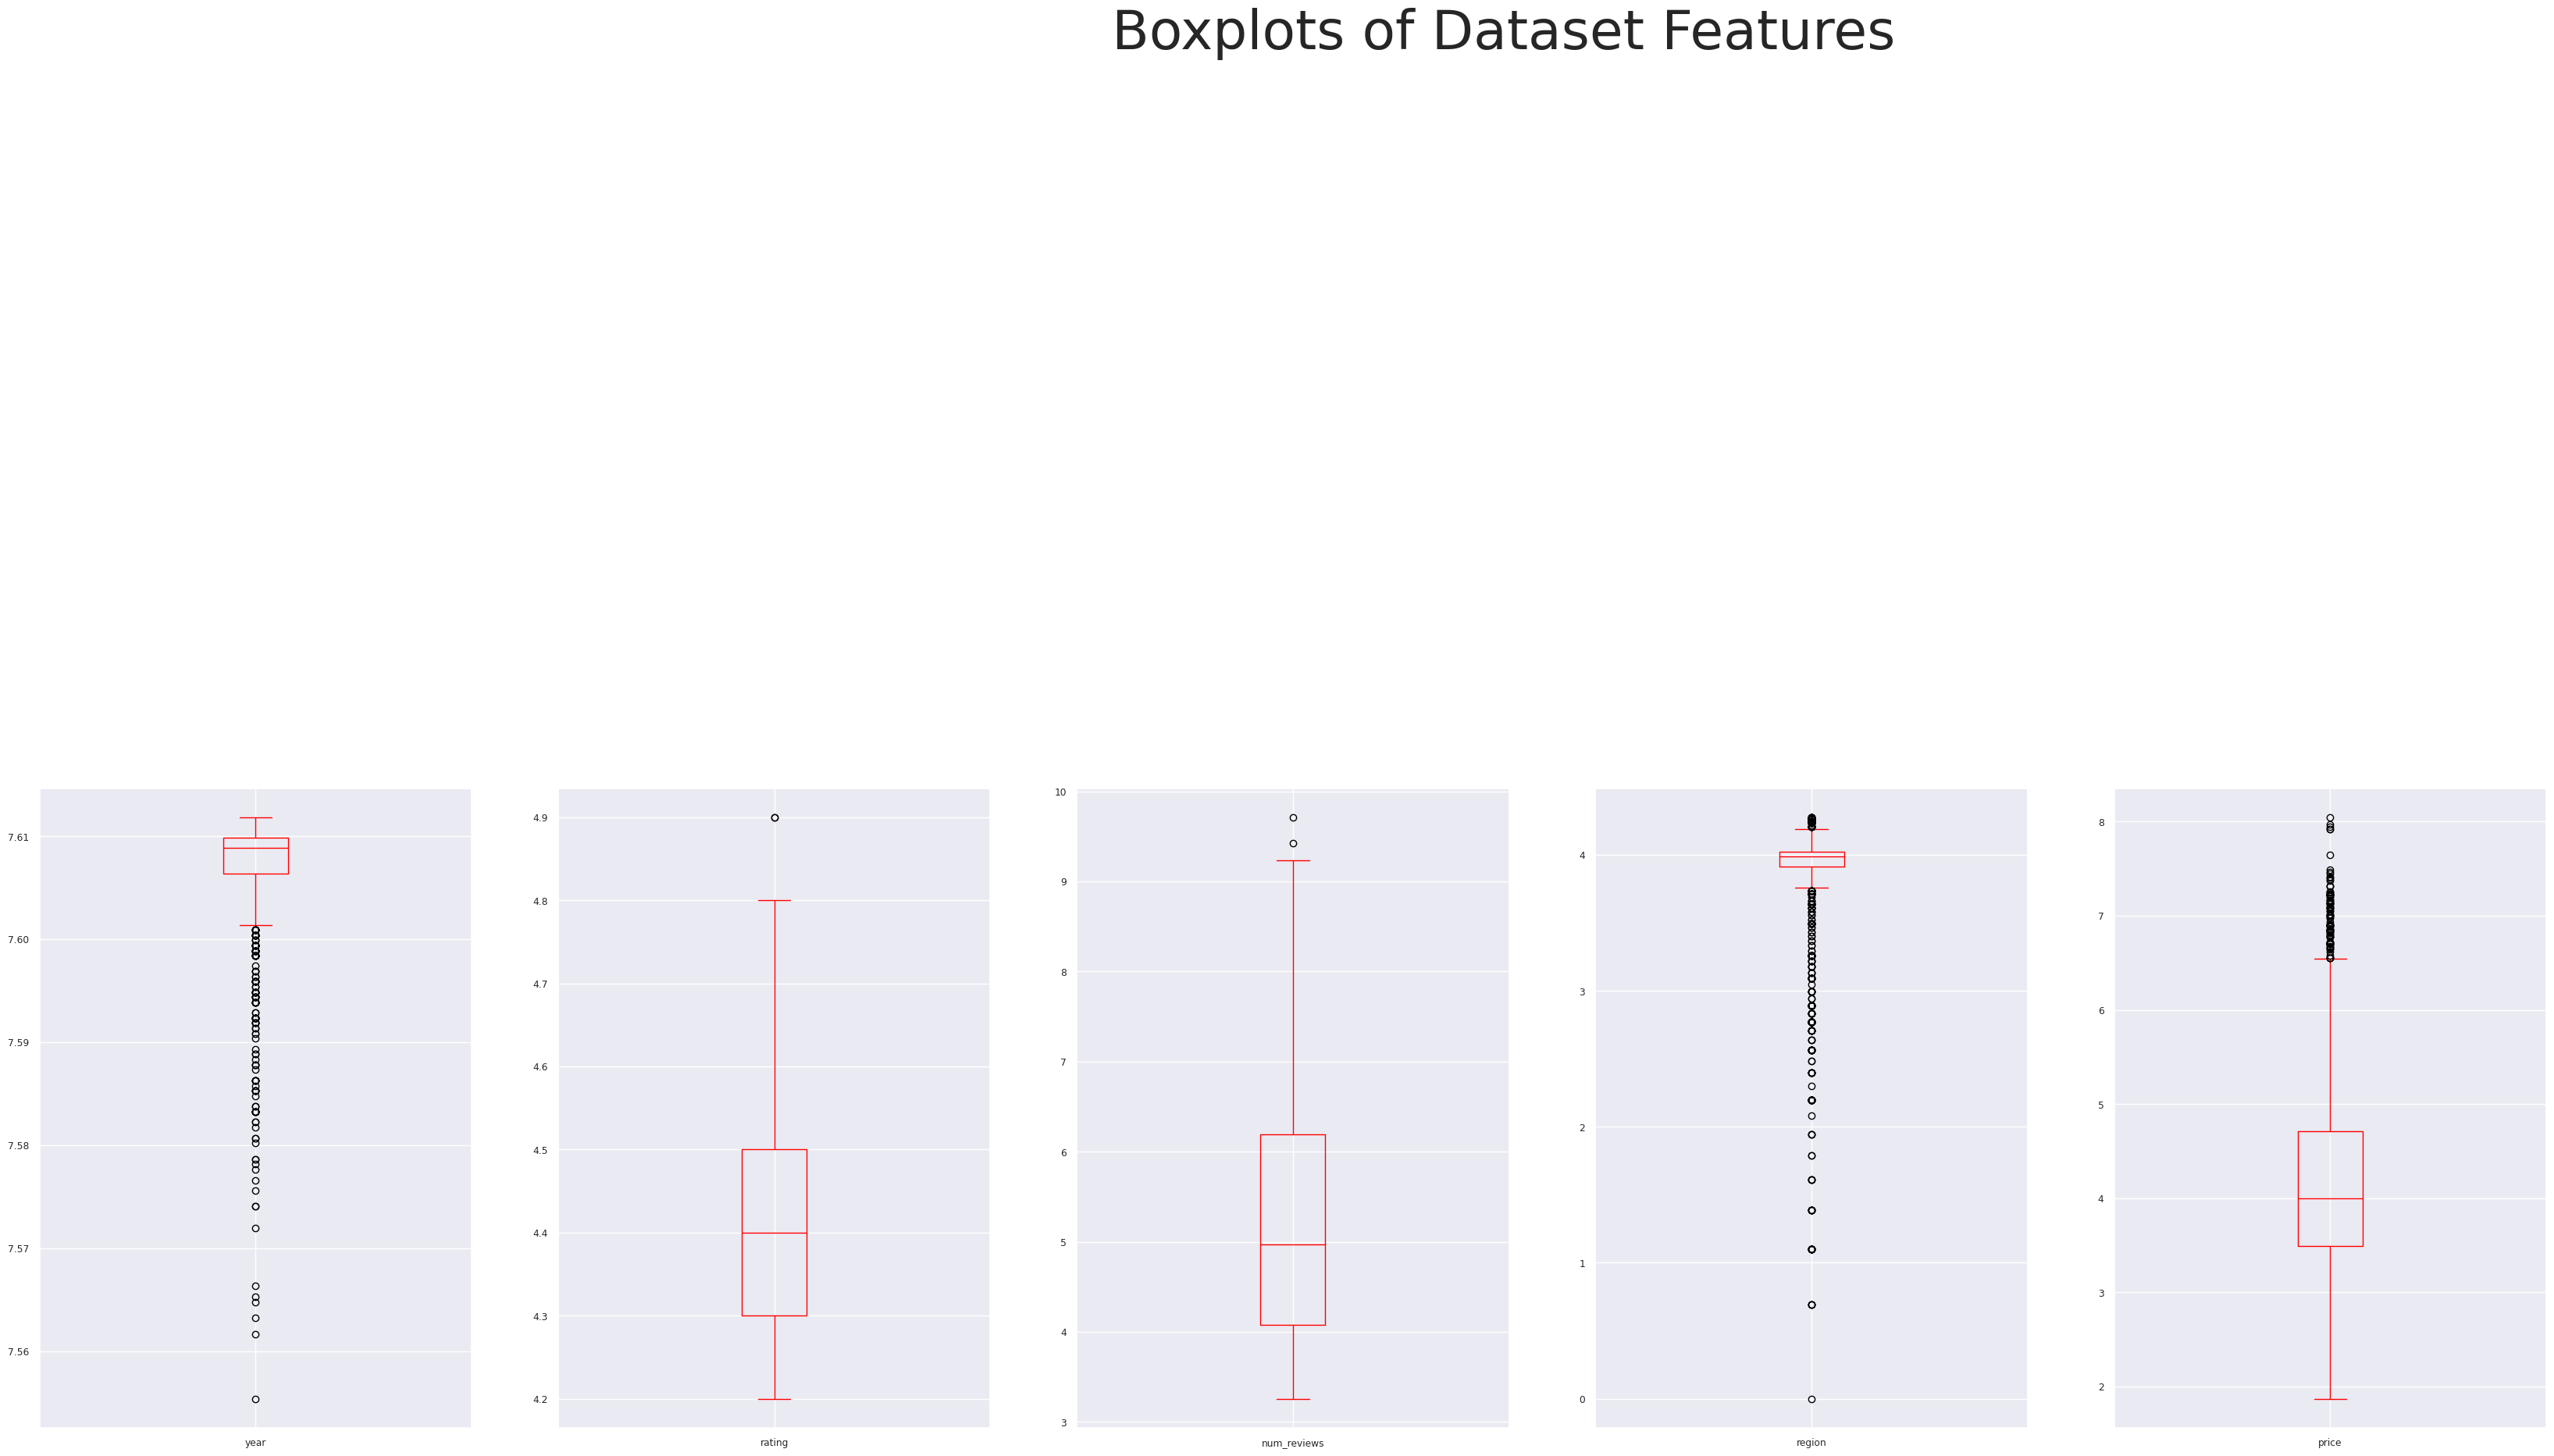

In [139]:
wine.plot(kind='box',subplots=True,layout=(8,6),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset Features',fontsize=50)
plt.show()

In [140]:
# Create a copy of the original data for comparison
wine_df_copy = wine.copy()
def remove_outliers_iqr(df,exclude_columns):
  # Loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue # Skip excluded columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df
# Define the columns to exclude
exclude_columns=['rating','price']
# Remove Outliers
loan=remove_outliers_iqr(wine,exclude_columns)

# Print shapes of data before and after removing outliers
print('Shape of data before removing outliers:',wine_df_copy.shape)
print('Shape of data after removing outliers:',wine.shape)
print('Number of outlier removed:',wine_df_copy.shape[0]-loan.shape[0])

Shape of data before removing outliers: (1978, 5)
Shape of data after removing outliers: (1978, 5)
Number of outlier removed: 584


##Model Training and Evaluation


###Regression Modeling
* Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

In [141]:
wine['price'].value_counts()

,count
price,
4.330733,16
4.564348,12
3.580737,11
3.328627,11
3.583519,10
...,...
7.390799,1
3.122365,1
2.968361,1


In [142]:
x1=wine.drop('price',axis=1)
y1=wine[['price']]

In [143]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

print('Shape of Training Features: ',x1_train.shape)
print('Shape of Testing Features: ',x1_test.shape)
print('Shape of Training Target: ',y1_train.shape)
print('Shape of Testing Target: ',y1_test.shape)

Shape of Training Features:  (1582, 4)
Shape of Testing Features:  (396, 4)
Shape of Training Target:  (1582, 1)
Shape of Testing Target:  (396, 1)


In [144]:
models={
    'Linear_Regression':LinearRegression(),
    'RandomForest_Regressor':RandomForestRegressor(),
    'GradientBoosting_Regressor':GradientBoostingRegressor(),
    'DecisionTree_Regressor':DecisionTreeRegressor(),
    'SVM':SVR(),
    # 'MLP_Regressor':MLP_Regressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'LGBMRegressor':LGBMRegressor(),
    # 'CatBoostRegressor':CatBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [145]:
# Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}
# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
  # Train model on resampled data
  model.fit(x1_train, y1_train)

  #Predictions
  y1_pred = model.predict(x1_test)
  # Calculate metrics
  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)
  # Store results in the dictionary
  results['Model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)
# Convert results to a DataFrame
results_df=pd.DataFrame(results)
#Displays the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 1582, number of used features: 4
[LightGBM] [Info] Start training from score 4.200161


,Model,MSE,MAE,R2
0,Linear_Regression,0.430748,0.510316,0.608799
1,RandomForest_Regressor,0.399627,0.468901,0.637063
2,GradientBoosting_Regressor,0.323112,0.433388,0.706553
3,DecisionTree_Regressor,0.674184,0.598825,0.387713
4,SVM,0.611007,0.604954,0.445090
5,AdaBoostRegressor,0.487987,0.561332,0.556816
6,ExtraTreesRegressor,0.448393,0.483956,0.592774
7,BaggingRegressor,0.452976,0.498130,0.588612
8,LGBMRegressor,0.361235,0.451025,0.671931
9,XGBRegressor,0.379723,0.455413,0.655139


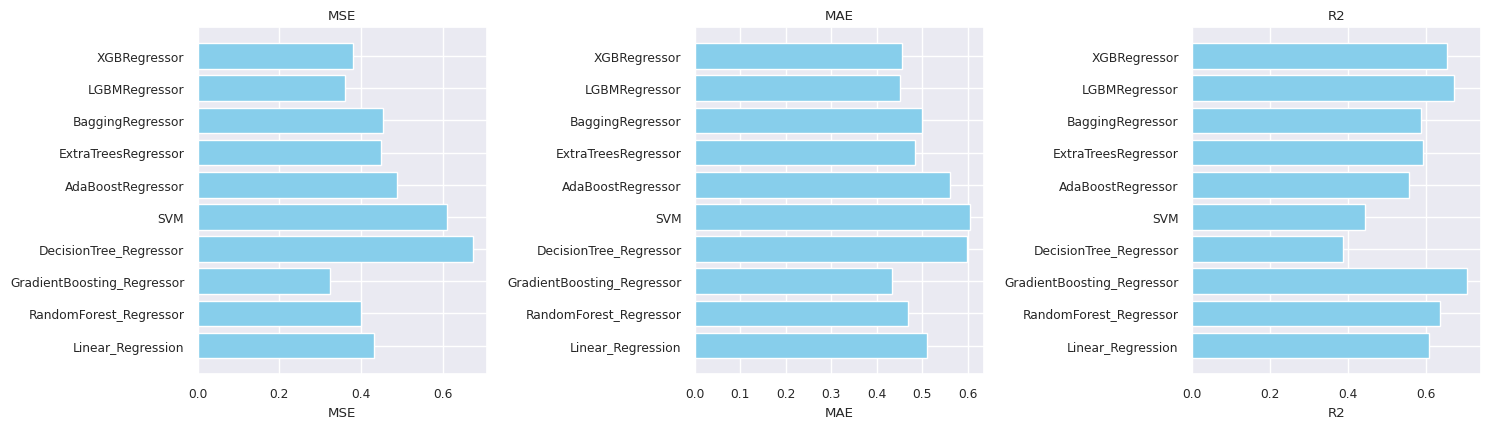

In [146]:
# Plotting each metriv
metrics=['MSE','MAE','R2']
plt.figure(figsize=(15,8))
for i, metric in enumerate(metrics):
  plt.subplot(2,3,i+1)
  plt.barh(results_df['Model'],results_df[metric],color='skyblue')
  plt.title(metric)
  #plt.xlim(0,1)
  plt.xlabel(metric)
plt.tight_layout()
plt.show()

####Regression on Scaled Data

In [147]:
x1s=wine_scaled_df.drop('price',axis=1)
y1s=wine_scaled_df[['price']]
x1s_train,x1s_test,y1s_train,y1s_test = train_test_split(x1s,y1s,test_size=0.2,random_state=42)
# Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}
# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
  # Train model on resampled data
  model.fit(x1s_train, y1s_train)

  #Predictions
  y1s_pred = model.predict(x1s_test)
  # Calculate metrics
  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1s_test,y1s_pred)
  # Store results in the dictionary
  results['Model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)
# Convert results to a DataFrame
results_df1=pd.DataFrame(results)
#Displays the results
#results_df1
# Sort by Accuracy
results_df1=results_df1.sort_values(by='MSE',ascending=True)
# Display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Blues')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 1582, number of used features: 9
[LightGBM] [Info] Start training from score 0.006131


,Model,MSE,MAE,R2
8,LGBMRegressor,0.233248,0.357491,0.771691
9,XGBRegressor,0.244456,0.369681,0.760720
2,GradientBoosting_Regressor,0.262710,0.388858,0.742852
1,RandomForest_Regressor,0.274287,0.396533,0.731520
7,BaggingRegressor,0.302776,0.410025,0.703634
6,ExtraTreesRegressor,0.305781,0.414242,0.700693
4,SVM,0.378841,0.453389,0.629180
0,Linear_Regression,0.391315,0.485793,0.616970
5,AdaBoostRegressor,0.406672,0.517345,0.601938
3,DecisionTree_Regressor,0.509831,0.515510,0.500963


###Pickle File

In [148]:
import pickle
#Save the reggression model
r_model = LGBMRegressor()
r_model.fit(x1s_train, y1s_train.values.ravel())
with open('regression_model.pkl','wb') as file:
  pickle.dump(model,file)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 1582, number of used features: 9
[LightGBM] [Info] Start training from score 0.006131


## **Final Report**

> - Outliers are removed using IQR method
> - Scaled (standard scaler)
> - Skeweness handled





* The LGBM Regressor demonstrated the best performance across all metrics, with the lowest MSE (0.2332), lowest MAE (0.3574), and highest R² score (0.7717). This indicates that it makes the most accurate predictions among the models tested.
* LGBM Regressor is the best choice for this dataset as it outperforms all other models in accuracy and error minimization.